<a href="https://colab.research.google.com/github/jaypro26022002/D-o-n-nh-gi-ch-t-l-ng-xe-t-/blob/main/%20Car%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài tập  lớnlớn

In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

In [83]:
col_name = ['buying', 'maint' , 'doors' , 'persons', 'lug_boot' , 'safety','class']

In [84]:
from google.colab import files
uploaded = files.upload()

Saving car.data.csv to car.data (1).csv


In [85]:
#Load dataset
df = pd.read_csv("car.data.csv",names=col_name) 

In [86]:
df.describe()

buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210

In [87]:
df.shape

(1728, 7)

In [88]:
#ccheck for missing nan(kiem tra Giá trị bị mất?)
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [89]:
#kiểm tra số lượng giá trị 
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

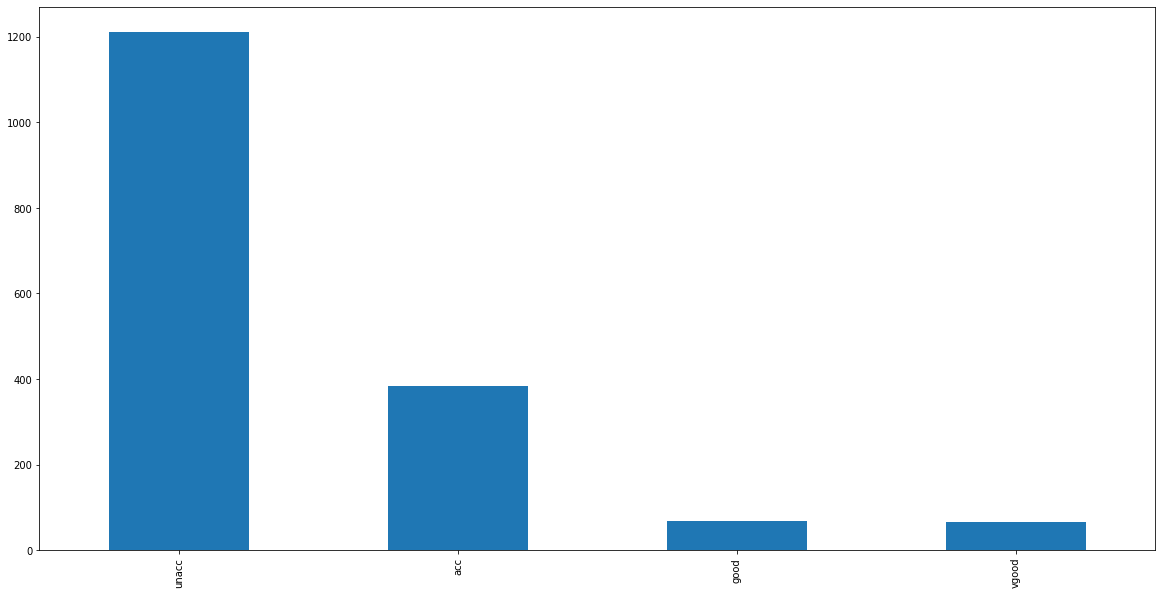

In [90]:
df['class'].value_counts().plot(kind='bar',figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


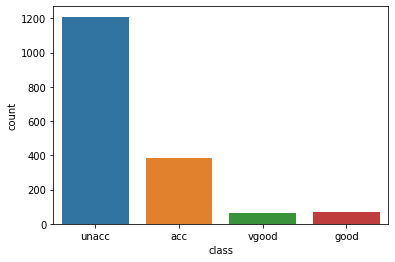

In [91]:
sns.countplot(df['class'])

In [92]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [93]:
#kiểm tra loại tệp 
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Enconding(Mã hóa)

In [94]:
buying_label = { ni : n for n , ni in enumerate(set(df['buying']))}
maint_label = { ni : n for n , ni in enumerate(set(df['maint']))}
doors_label = { ni : n for n , ni in enumerate(set(df['doors']))}
persons_label = { ni : n for n , ni in enumerate(set(df['persons']))}
lug_boot_label  = { ni : n for n , ni in enumerate(set(df['lug_boot']))}
safety_label = { ni : n for n , ni in enumerate(set(df['safety']))}
class_label = { ni : n for n , ni in enumerate(set(df['class']))}

In [95]:
buying_label

{'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}

In [96]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [97]:
maint_label

{'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}

In [98]:
#xuất ra dữ liệu Mappings 
print('buying_label = {}'.format(buying_label))
print('maint_label = {}'.format(maint_label))
print('doors_label = {}'.format(doors_label))
print('persons_label = {}'.format(persons_label))
print('lug_boot_label  = {}'.format(lug_boot_label))
print('safety_label = {}'.format(safety_label))
print('class_label = {}'.format(class_label))

buying_label = {'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}
maint_label = {'low': 0, 'high': 1, 'vhigh': 2, 'med': 3}
doors_label = {'5more': 0, '3': 1, '2': 2, '4': 3}
persons_label = {'more': 0, '2': 1, '4': 2}
lug_boot_label  = {'med': 0, 'small': 1, 'big': 2}
safety_label = {'high': 0, 'low': 1, 'med': 2}
class_label = {'acc': 0, 'vgood': 1, 'good': 2, 'unacc': 3}


In [100]:
#chuyển df thành df1
df1 = df

In [101]:
df1.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [102]:
#gán Nhãn
df1['buying'] = df1['buying'].map(buying_label)

In [103]:
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)

In [104]:
df1['persons'] = df1['persons'].map(persons_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)

In [105]:
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)

In [107]:
df1.head()

buying  maint  doors  persons  lug_boot  safety  class
0       2      2      2        1         1       1      3
1       2      2      2        1         1       2      3
2       2      2      2        1         1       0      3
3       2      2      2        1         0       1      3
4       2      2      2        1         0       2      3

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
lb=LabelEncoder()

In [110]:
df2 = df

In [111]:
for i in df2.columns:
    df2[i] = lb.fit_transform(df2[i])

In [112]:
df2.head()

buying  maint  doors  persons  lug_boot  safety  class
0       2      2      2        1         1       1      3
1       2      2      2        1         1       2      3
2       2      2      2        1         1       0      3
3       2      2      2        1         0       1      3
4       2      2      2        1         0       2      3

In [114]:
df1.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [115]:
df2.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

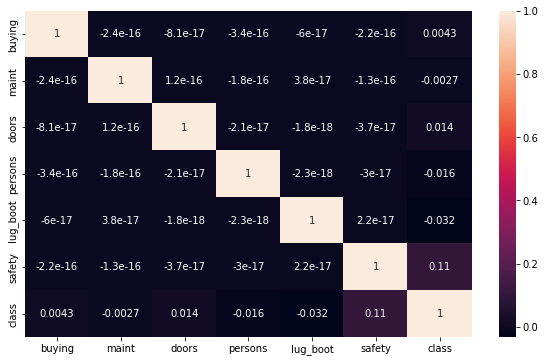

In [116]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

In [117]:
df1.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [118]:
#mô tả đầy đủ dữ liệu hơn
df1.describe()

buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.750000     0.750000     0.000000     0.000000   
50%       1.500000     1.500000     1.500000     1.000000     1.000000   
75%       2.250000     2.250000     2.250000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000     2.000000   

            safety        class  
count  1728.000000  1728.000000  
mean      1.000000     2.218171  
std       0.816733     1.257001  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       1.000000     3.000000  
75%       2.000000     3.000000  
max       2.000000     3.000000

In [36]:
Xfeatures = df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
ylabels = df1['class']

Tách Dữ liệu 

In [119]:
X_train, X_test, Y_train, Y_test , = train_test_split(Xfeatures, ylabels, test_size=0.30, random_state=7)  

In [120]:
# sử dụng - Logisitic Regression
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
# mo hinh logistic
model = LogisticRegression(solver='liblinear', random_state=0)

In [122]:
# 
model.fit(Xfeatures, ylabels)

LogisticRegression(random_state=0, solver='liblinear')

In [123]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(Xfeatures, ylabels)

In [124]:
model.classes_


array([0, 1, 2, 3])

In [125]:
model.intercept_

model.coef_

array([[ 0.05087846,  0.04285646, -0.02934585,  0.05344572,  0.03843909,
        -0.12662724],
       [-0.29968521, -0.12095645, -0.06667128, -0.1661883 ,  0.33805535,
        -3.20282112],
       [-0.46492235, -0.46492235, -0.05436715,  0.02084292, -0.04524124,
         0.15337857],
       [ 0.0755026 ,  0.05313097,  0.03072785, -0.04006457, -0.098798  ,
         0.33611821]])

In [126]:
model.predict_proba(Xfeatures)

array([[2.34307189e-01, 3.70930482e-03, 2.06234760e-02, 7.41360030e-01],
       [2.03630530e-01, 1.45197682e-04, 2.29966204e-02, 7.73227651e-01],
       [2.51303562e-01, 8.19169164e-02, 1.72803806e-02, 6.49499141e-01],
       ...,
       [2.07958347e-01, 1.59763379e-02, 1.23239725e-01, 6.52825590e-01],
       [1.77595730e-01, 6.23569285e-04, 1.33226149e-01, 6.88554551e-01],
       [1.92261181e-01, 2.40335630e-01, 9.00177015e-02, 4.77385488e-01]])

In [127]:
model.predict(Xfeatures)

array([3, 3, 3, ..., 3, 3, 3])

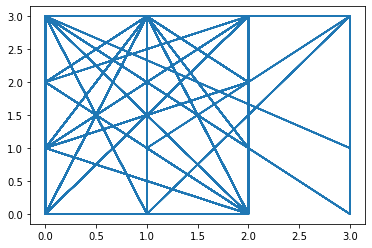

In [128]:
#vẽ dữ liệu  
plt.plot(Xfeatures, ylabels, color ='tab:blue')  

logistic Sigmo

In [129]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

In [130]:
# extended data 
Xfeatures = np.concatenate((np.ones((1, Xfeatures.shape[1])), Xfeatures), axis = 0)

In [131]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(Xfeatures, ylabels, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = Xfeatures.shape[1]
    d = Xfeatures.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = Xfeatures[:, i].reshape(d, 1)
            yi = ylabels[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = Xfeatures.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(Xfeatures, ylabels, w_init, eta) 
print(w[-1])

[[1000.31041526]
 [1498.63680652]
 [1666.03416537]
 ...
 [ 500.59423876]
 [ 666.46264573]
 [ 334.27897078]]


In [132]:
print(sigmoid(np.dot(w[-1].T, Xfeatures)))  

[[1. 1. 1. 1. 1. 1.]]


In [133]:
Xfeatures = df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
ylabels = df1['class']

In [135]:
#Import the module
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import numpy as np

In [56]:
#load datadata
data = pd.read_csv('car.data.csv', delim_whitespace=True)
#view first six rows of dataset
df2[0:6]

buying  maint  doors  persons  lug_boot  safety  class
0       2      2      2        1         1       1      3
1       2      2      2        1         1       2      3
2       2      2      2        1         1       0      3
3       2      2      2        1         0       1      3
4       2      2      2        1         0       2      3
5       2      2      2        1         0       0      3

In [136]:
#find total observations in dataset
len(df2.index) 

1728

In [137]:
#define the predictor variables and the response variable
X = df2[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df2['class']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)  

In [138]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X ,y )

#use model to make predictions on test data
y_pred = log_regression.predict(X)

In [139]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y , y_pred) 
cnf_matrix

array([[   0,    0,    0,  384],
       [   0,    0,    0,   65],
       [   0,    0,    0,   69],
       [   0,    0,    0, 1210]])

In [140]:
print("Accuracy:",metrics.accuracy_score(y , y_pred))

Accuracy: 0.7002314814814815


#####Thuật toán Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


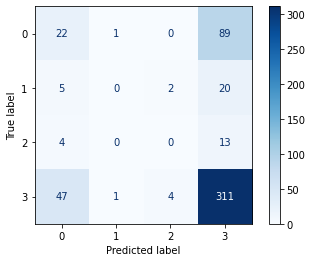

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
import pydot
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from IPython.display import HTML, Image
feature_list = Xfeatures.columns.values


#Model
RFC = RandomForestClassifier(n_estimators=10, bootstrap=True, random_state = 0)

#fiting the model(Huấn luyện mô hình)
RFC.fit(X_train, Y_train);
# mô hình ma trận 
plot_confusion_matrix(RFC, X_test, Y_test, cmap=plt.cm.Blues);

In [151]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train, Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [152]:
Y_pred_rf = rf.predict(X_test)

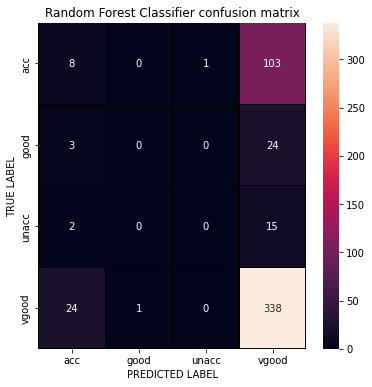

In [153]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_rf = confusion_matrix(Y_test, Y_pred_rf)

x_axis_labels = ["acc", "good","unacc","vgood"]
y_axis_labels = ["acc", "good","unacc","vgood"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_rf, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("rfcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [154]:
#Mô hình rừng 
# Save the tree as a png image
export_graphviz(RFC.estimators_[0], out_file = 'car.data_RFC.dot', feature_names = feature_list, rounded = True, precision = 1, filled = True, class_names=['0','1','2','3'])
(graph, ) = pydot.graph_from_dot_file('car.data_RFC.dot')
graph.write_png('car.data_RFC - Copy.png');
Image('car.data_RFC - Copy.png')

In [155]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_rf)))
res = cross_val_score(rf, X_test, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,rf.predict(X_test))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(rf.score(X_test, Y_test)*100, 2)))


TEST RESULTS:

Random Forest Classifier report:

              precision    recall  f1-score   support

           0       0.22      0.07      0.11       112
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        17
           3       0.70      0.93      0.80       363

    accuracy                           0.67       519
   macro avg       0.23      0.25      0.23       519
weighted avg       0.54      0.67      0.58       519


Average Accuracy:	0.6550

Standard Deviation:	0.0295

Confusion Matrix:
[[  8   0   1 103]
 [  3   0   0  24]
 [  2   0   0  15]
 [ 24   1   0 338]]

Accuracy Score:		66.67%
